#### Student informations (Max. 2 students) should be written in this cell (Student ID, Student Name).

Student 1: 150210006 Yusuf Yıldız

Student 2: 150210016 Şafak Özkan Pala

In [1]:
%load_ext autoreload
%autoreload 2

# HOMEWORK 4 - NON-LINEAR CLASSIFICATION WITH SUPPORT VECTOR MACHINES

In this homework, you are assigned to train Support Vector Machines models for non-linear classification problems. This homework will help you to get familiar with **scikit-learn (sklearn)** machine learning libray. You may install sklearn in your conda environments by calling 


```bash
conda install scikit-learn
```

Your homework includes 3 problems in total. Please read this notebook carefully to provide all required solutions to the problems. ( For your questions, e-mail to : ergunesr@itu.edu.tr )

First, we will start by reviweing Support Vector Machines. 

## Support Vector Machines (SVM)

Suppose we have a two-class classification training dataset of $P$ input/output pairs $\{(\mathbf{x}_p, y_p)\}^{P}_{p=1}$ with the labels $y_p \in \{-1, +1\}$. Given a training set, SVM tries to find a decision boundary that maximizes the geometric margin, which reflects a confident set of predictions on the training set and a good fit to the training data. SVM results in a classifier that separates different class examples with a geometric margin, which is also called "gap". 

Let's say we have a linearly separable dataset, primal optimization problem for finding the maximum margin classifier is:

<div style="text-align:center">

$ \min_{\gamma, \textbf{w}, b} \frac{1}{2} \|\mathbf{w}\|^2 $
</div>

<div style="text-align:center">

$ s.t. y_p(\textbf{w}^T \textbf{x}_p + b) \geq 1,   \quad  p = 1, ... , P $

</div>

The above is an optimization problem with a convex quadratic objectuve and only linear constraints. Its solution gives us the **optimal margin classifier** . This optimization problem can be solved using Quadratic Programming. 

By employing **Lagrange Duality**, optimal margin classifiers can work efficiently in very high dimensional spaces. Finally, SVM classification solves the following problem:

<div style="text-align:center">

$ \min_{\textbf{w}, b} \|\mathbf{w}\|^2 + C \sum_{p=1}^P \xi_p $
</div>

<div style="text-align:center">

$ s.t. y_p(\textbf{w}^T\textbf{x}_p + b) \geq 1 - \xi_p,   \quad  p = 1, ... , P $

</div>


<div style="text-align:center">

$ \xi_p \geq 0 , \quad  p = 1, ... , P $

</div>

After solving, SVM predicts "+1" if $(\textbf{w}^T\textbf{x}_p + b) \geq 0$ and "-1" otherwise. The decision boundary is given by $ (\textbf{w}^T\textbf{x}_p + b) = 0$ .  


### Kernels

Linearly non-separable features often become linearly separable after they are mapped to a high dimensional feature space. We do not need to compute the feature mappings $\phi (\textbf{x}_p)$ and it saves large amount of computations in practice. We only need to work with their kernels. SVM kernels provide a powerful framework for capturing complex relationships in the data and building robust classification models. There are several commonly used kernels: **linear kernel, polynomial kernel, and Radial Basis Function kernel**. 

### The RBF Kernel

This kernel has the formula:

$K(\textbf{x}_i, \textbf{x}_j) = \phi(\textbf{x}_i)^T \phi(\textbf{x}_j)$

$= exp (-\gamma \|\textbf{x}_i - \textbf{x}_j\|^2 ), \quad \gamma > 0 $

This is the same as **Gaussian** kernel, except that term $\frac{1}{2 \sigma ^2}$ in the Gaussian kernel has been replaced by $\gamma$. It provides a reasnable measure of $\textbf{x}_i$ and $\textbf{x}_j$'s similarity, it is close to 1 when $\textbf{x}_i$ and $\textbf{x}_j$ are close, and near 0 when they are far apart. 

In this assignment you are expected to train SVM models with **scikit-learn(sklearn)**. Sklearn is a popular machine learning library in Python that provides a user-friendly interface for building SVM models. Here's a basic outline of using SVM in scikit-learn:

In [2]:
# Importing the SVM class:
from sklearn.svm import SVC

Support Vector Classification (SVC) is a variant of Support Vector Machines (SVM) primarily used for classification tasks. It works by finding the optimal hyperplane that separates the classes in the feature space while maximizing the margin between them. Sklearn offers various kernels such as linear, polynomial, RBF, and sigmoid kernels.

Let's say we have the following toy training set **x_train** and **y_train**:

In [3]:
# Toy example data for two classes
x_train = [[-0.2, 0.5],
           [-0.3, 0.6],
           [-0.5, 0.4],
           [-0.6, 0.1],
           [-0.5, -0.2],
           [-0.3, -0.2],
           [-0.2, -0.05],
           [0.3, -0.4],
           [0.5, -0.3],
           [0.4, -0.6],
           [0.2, -0.7],
           [0.1, -0.5]]

y_train = [1, 1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1]

Let's initialize the SVC:

In [4]:
#Initializing the SVM Classifier
svm_classifier = SVC(kernel='linear')

In [5]:
# Fit the model to the training data
svm_classifier.fit(x_train, y_train)

# Make predictions
# y_pred = svm_classifier.predict(X_test)
# Note: We're making predictions on the training data here for simplicity
y_pred = svm_classifier.predict(x_train)

# Calculate accuracy

from sklearn.metrics import accuracy_score
# accuracy = accuracy_score(y_test, y_pred)
# Note: We don't have test labels y_test in this example, so we're calculating accuracy on training data
accuracy = accuracy_score(y_train, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


You are allowed to use various fuctions and classes sklearn provides for performance calculations.

## Q1) Non-linear Decision Boundary with RBF in 2-classes 

In this question we will see how an RBF kernel can choose a non-linear decision boundary. You have been provided with "data.npy". This data is normalized, so you do not need any preprocessing. Please fit your support vector classifier by using sklearn library, and plot the examples and the decision boundary. Train an SVM model with RBF kernel with $\gamma = 100$. Once you have the model trained, please visualize the decision boundary. 

Run the following cell to load the data:

In [6]:
import numpy as np

def read_data_from_npy(filename):
    """
    Reads numpy arrays x and y from .npy file.
    
    Parameters:
        filename (str): Name of the .npy file to read.
    
    Returns:
        numpy.ndarray, numpy.ndarray: Input features array (x) and target labels array (y).
    """
    data = np.load(filename, allow_pickle=True)
    x = data.item().get('x')
    y = data.item().get('y')
    print(f"Data loaded from {filename}.")
    return x, y

# Read data from .npy file
x_loaded, y_loaded = read_data_from_npy('data.npy')

Data loaded from data.npy.


Let's visualize the data: 

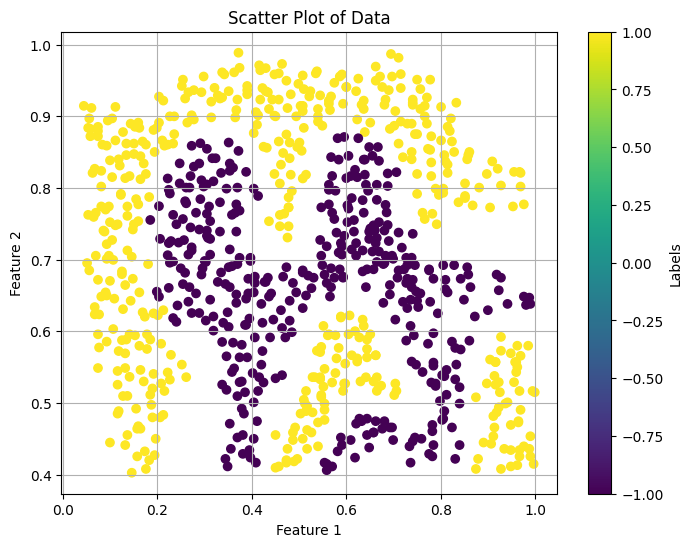

In [7]:
import matplotlib.pyplot as plt

def plot_scatter(x, y):
    """
    Plots the data as a scatter plot.
    
    Parameters:
        x (numpy.ndarray): Input features array.
        y (numpy.ndarray): Target labels array.
    """
    plt.figure(figsize=(8, 6))
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap='viridis')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Scatter Plot of Data')
    plt.colorbar(label='Labels')
    plt.grid(True)
    plt.show()

# Example usage:
plot_scatter(x_loaded, y_loaded)

In this question, you are expected to use a Support Vector Classifier from sklearn.

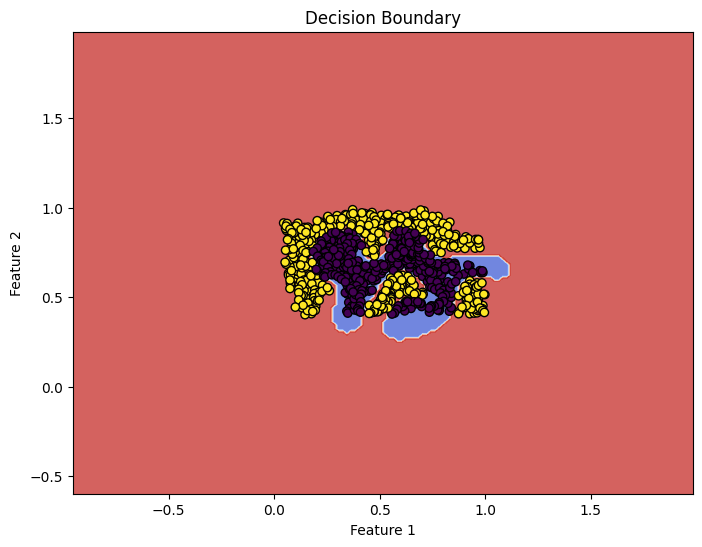

In [8]:
##############################################################################
# TODO: -Fit SVC do the dataset by using RBF kernel in sklearn.              #
# -Set gamma = 100.                                                          #
# -Visualize the decision boundary                                           #
##############################################################################

# Fit SVC with RBF kernel
svc = SVC(kernel='rbf', gamma=100)
svc.fit(x_loaded, y_loaded)

# Visualize decision boundary
def plot_decision_boundary(model, X, y):
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot data points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolors='k')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title('Decision Boundary')

# Plot decision boundary
plt.figure(figsize=(8, 6))
plot_decision_boundary(svc, x_loaded, y_loaded)
plt.show()

##############################################################################
#                             END OF YOUR CODE                               #
##############################################################################

## Q2) Multi-Class Non-linear Classification with Support Vectors

In this question, you are assigned to implement a non-linear SVC for the toy dataset "Iris". Split the data into training and test sets (%30-%70 ratio). You may use **train_test_split** from **sklearn.model_selection**. Normalize the dataset. After that, you are assigned to call:

1) Linear,
2) Polynomial,
3) Gaussian RBF,

kernels on your classifiers.

You should tune each model using **cross validation** (you may use sklearn) and report the best hyperparameters $\gamma$ and $C$ you've found. You will use these hyperparameters for testing later. Once you have selected the best hyperparameters for each kernel, Report the following (on the **test** set):

- Confusion matrix, Recall, Precision, and F1 Score.

**Note**: Suggested ranges for searching C and $\gamma$ parameters:

- C (Regularization parameter): [0.1, 1, 10, 100, 1000]. It's common to use a logarithmic scale for searching C values.

- $\gamma$ (Kernel coefficient for 'rbf' and 'poly' kernels): [0.001, 0.01, 0.1, 1, 10, 100] Since the dataset will be scaled, you can explore a broader range of gamma values.

For this question, first, we will call **load_iris** from sklearn. 

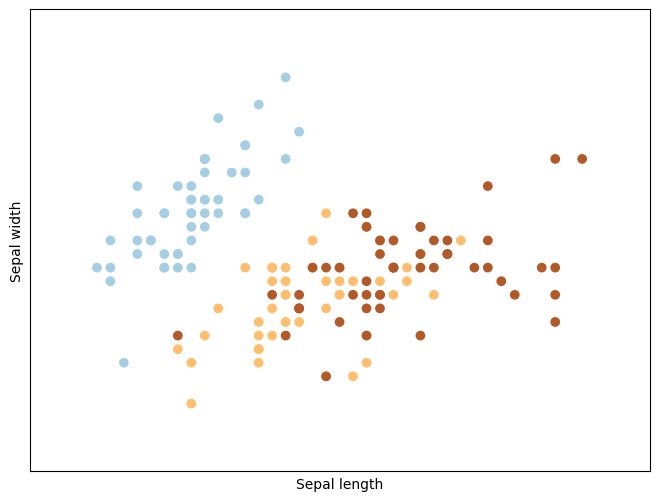

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets

# Import the Iris dataset
iris = datasets.load_iris()

# Extract features and target variable
X = iris.data[:, :2]  # We only take the first two features.
Y = iris.target

# Define the minimum and maximum values for plotting
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

# Create a new figure
plt.figure(2, figsize=(8, 6))
plt.clf()

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

# Set limits for the plot
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

# Remove ticks
plt.xticks(())
plt.yticks(())

# Display the plot
plt.show()


In [2]:
#############################################################################################################################
################################################## TO DO ####################################################################
#Split the dataset into training and test sets using train_test_split() from sklearn.model_selection.                       #
#Use a 70-30 split ratio.                                                                                                   #
#Normalize the dataset using StandardScaler from sklearn.preprocessing.                                                     #
#Define parameter grids for each kernel type (linear, poly, and rbf) for hyperparameter tuning.                             #
#Perform cross-validation for each kernel type.                                                                             #
#Report the best hyperparameters for each kernel type.                                                                      #
#Predict on the test set using each tuned model.                                                                            #
#Evaluate each model using confusion matrix, recall, precision, and F1 score. Use confusion_matrix and                      # 
#classification_report from sklearn.metrics.                                                                                #
#############################################################################################################################

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
import pickle

# Split the dataset into training and test sets
print("Splitting the dataset into training and test sets...")
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
print("Splitting completed.")

# Normalize the dataset
print("Normalizing the dataset...")
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print("Normalization completed.")

# Define parameter grids for each kernel type
param_grid_linear = {'C': [0.1, 1, 10, 100, 1000]}
param_grid_poly = {'C': [0.1, 1, 10, 100, 1000], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100], 'degree': [2, 3]} # [2, 3, 4, 5]
param_grid_rbf = {'C': [0.1, 1, 10, 100, 1000], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

# Perform cross-validation for each kernel type
print("Performing cross-validation for the linear kernel...")
grid_linear = GridSearchCV(SVC(kernel='linear'), param_grid_linear, cv=5, verbose=3)
grid_linear.fit(X_train, y_train)
print("Cross-validation for linear kernel completed.")

with open('trained_model_q2_linear.pkl', 'wb') as file:
    pickle.dump(grid_linear, file)
print("Linear model saved as trained_model_q2_linear.pkl.")


print("Performing cross-validation for the polynomial kernel...")
grid_poly = GridSearchCV(SVC(kernel='poly'), param_grid_poly, cv=5, verbose=3)
grid_poly.fit(X_train, y_train)
print("Cross-validation for polynomial kernel completed.")

with open('trained_model_q2_poly.pkl', 'wb') as file:
    pickle.dump(grid_poly, file)
print("Polynomial model saved as trained_model_q2_poly.pkl.")


print("Performing cross-validation for the RBF kernel...")
grid_rbf = GridSearchCV(SVC(kernel='rbf'), param_grid_rbf, cv=5, verbose=3)
grid_rbf.fit(X_train, y_train)
print("Cross-validation for RBF kernel completed.")

with open('trained_model_q2_rbf.pkl', 'wb') as file:
    pickle.dump(grid_rbf, file)
print("RBF model saved as trained_model_q2_rbf.pkl.")


# Report the best hyperparameters for each kernel type
print("Best hyperparameters for linear kernel:", grid_linear.best_params_)
print("Best hyperparameters for polynomial kernel:", grid_poly.best_params_)
print("Best hyperparameters for RBF kernel:", grid_rbf.best_params_)

# Predict on the test set using each tuned model
print("Predicting on the test set using the linear kernel...")
y_pred_linear = grid_linear.predict(X_test)
print("Prediction using linear kernel completed.")

print("Predicting on the test set using the polynomial kernel...")
y_pred_poly = grid_poly.predict(X_test)
print("Prediction using polynomial kernel completed.")

print("Predicting on the test set using the RBF kernel...")
y_pred_rbf = grid_rbf.predict(X_test)
print("Prediction using RBF kernel completed.")

# Evaluate each model
print("\nLinear Kernel:")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_linear))
print("Classification Report:\n", classification_report(y_test, y_pred_linear))

print("\nPolynomial Kernel:")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_poly))
print("Classification Report:\n", classification_report(y_test, y_pred_poly))

print("\nRBF Kernel:")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rbf))
print("Classification Report:\n", classification_report(y_test, y_pred_rbf))

#############################################################################################################################
#                                                    END OF YOUR CODE                                                       #
#############################################################################################################################

Splitting the dataset into training and test sets...
Splitting completed.
Normalizing the dataset...
Normalization completed.
Performing cross-validation for the linear kernel...
Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5] END .............................C=0.1;, score=0.905 total time=   0.0s
[CV 2/5] END .............................C=0.1;, score=0.667 total time=   0.0s
[CV 3/5] END .............................C=0.1;, score=0.762 total time=   0.0s
[CV 4/5] END .............................C=0.1;, score=0.905 total time=   0.0s
[CV 5/5] END .............................C=0.1;, score=0.714 total time=   0.0s
[CV 1/5] END ...............................C=1;, score=0.905 total time=   0.0s
[CV 2/5] END ...............................C=1;, score=0.714 total time=   0.0s
[CV 3/5] END ...............................C=1;, score=0.762 total time=   0.0s
[CV 4/5] END ...............................C=1;, score=0.905 total time=   0.0s
[CV 5/5] END ...................

Splitting the dataset into training and test sets...
Splitting completed.
Normalizing the dataset...
Normalization completed.


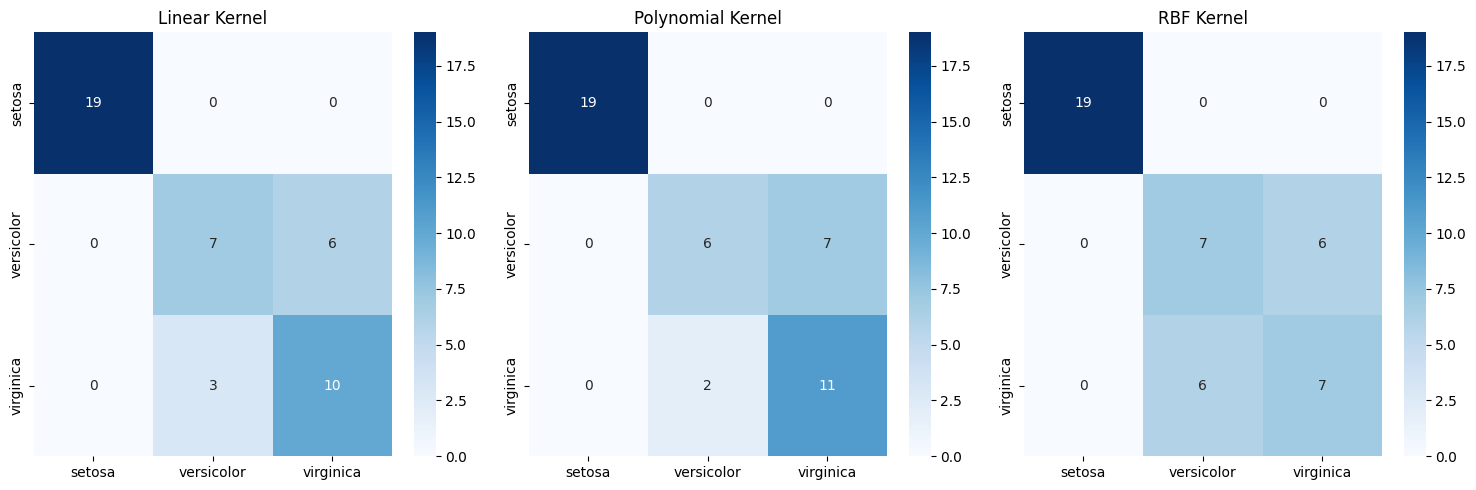

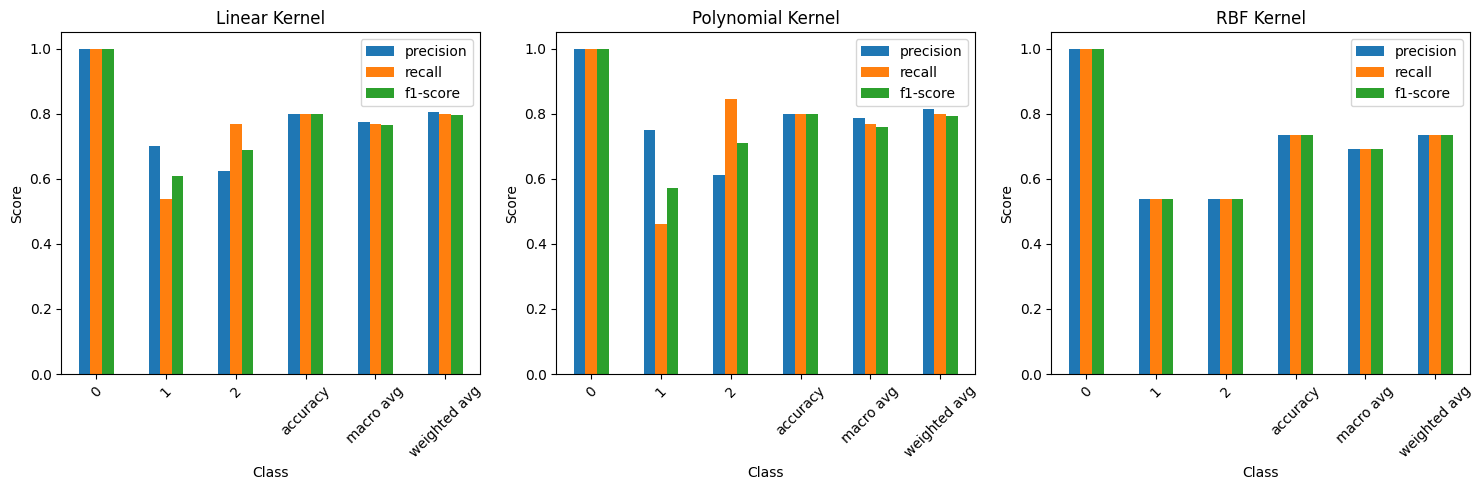

In [16]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pickle
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn import datasets
import pandas as pd

# Import the Iris dataset
iris = datasets.load_iris()

# Extract features and target variable
X = iris.data[:, :2]  # We only take the first two features.
Y = iris.target

# Split the dataset into training and test sets
print("Splitting the dataset into training and test sets...")
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
print("Splitting completed.")

# Normalize the dataset
print("Normalizing the dataset...")
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print("Normalization completed.")

# Load the trained models
with open('trained_model_q2_linear.pkl', 'rb') as file:
    grid_linear = pickle.load(file)

with open('trained_model_q2_poly.pkl', 'rb') as file:
    grid_poly = pickle.load(file)

with open('trained_model_q2_rbf.pkl', 'rb') as file:
    grid_rbf = pickle.load(file)

# Predictions for linear kernel
y_pred_linear = grid_linear.predict(X_test)
cm_linear = confusion_matrix(y_test, y_pred_linear)
report_linear = classification_report(y_test, y_pred_linear, output_dict=True)

# Predictions for polynomial kernel
y_pred_poly = grid_poly.predict(X_test)
cm_poly = confusion_matrix(y_test, y_pred_poly)
report_poly = classification_report(y_test, y_pred_poly, output_dict=True)

# Predictions for RBF kernel
y_pred_rbf = grid_rbf.predict(X_test)
cm_rbf = confusion_matrix(y_test, y_pred_rbf)
report_rbf = classification_report(y_test, y_pred_rbf, output_dict=True)

# Plot confusion matrix
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.heatmap(cm_linear, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title('Linear Kernel')

plt.subplot(1, 3, 2)
sns.heatmap(cm_poly, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title('Polynomial Kernel')

plt.subplot(1, 3, 3)
sns.heatmap(cm_rbf, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title('RBF Kernel')

plt.tight_layout()
plt.show()

report_df_linear = pd.DataFrame(report_linear).transpose()
report_df_poly = pd.DataFrame(report_poly).transpose()
report_df_rbf = pd.DataFrame(report_rbf).transpose()

# Plot precision, recall, and F1-score
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
report_df_linear[['precision', 'recall', 'f1-score']].plot(kind='bar', figsize=(15, 5), ax=plt.gca())
plt.xlabel('Class')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.title('Linear Kernel')

plt.subplot(1, 3, 2)
report_df_poly[['precision', 'recall', 'f1-score']].plot(kind='bar', figsize=(15, 5), ax=plt.gca())
plt.xlabel('Class')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.title('Polynomial Kernel')

plt.subplot(1, 3, 3)
report_df_rbf[['precision', 'recall', 'f1-score']].plot(kind='bar', figsize=(15, 5), ax=plt.gca())
plt.xlabel('Class')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.title('RBF Kernel')

plt.tight_layout()
plt.show()


## Q3) CIFAR-10 with Non-linear SVM Exercise

In this question you are expected to train a multi class SVM model on **CIFAR-10** dataset. First, we will download and load the dataset, and visualize some random examples.

To obtain the dataset, you need to import **subprocess** module and run the following cell. By default, these commands will be executed in the current working directory where your Python script is located. 

In [2]:
# import subprocess

# # Download CIFAR-10 dataset
# subprocess.run(["wget", "http://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz"])

# # Extract CIFAR-10 dataset
# subprocess.run(["tar", "-xzvf", "cifar-10-python.tar.gz"])

# # Remove the downloaded tar.gz file
# subprocess.run(["rm", "cifar-10-python.tar.gz"])

# For Windows users, you can use the requests library to download the CIFAR-10 dataset and the tarfile library to extract it. Here's an example code snippet to download and extract the CIFAR-10 dataset:
import requests
import tarfile
import os

# Define the URL of the CIFAR-10 dataset
url = "http://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz"
filename = "cifar-10-python.tar.gz"

# Download CIFAR-10 dataset
print("Downloading CIFAR-10 dataset...")
response = requests.get(url)
with open(filename, 'wb') as f:
    f.write(response.content)
print("Download completed.")

# Extract CIFAR-10 dataset
print("Extracting CIFAR-10 dataset...")
with tarfile.open(filename, 'r:gz') as tar:
    tar.extractall()
print("Extraction completed.")

# Remove the downloaded tar.gz file
os.remove(filename)
print("Removed the downloaded tar.gz file.")

Download completed.
Extracting CIFAR-10 dataset...
Extraction completed.
Removed the downloaded tar.gz file.


CIFAR-10's samples are already splitted into a training and a test set by design. 

In [3]:
import pickle
import numpy as np
from data_utils import load_cifar10_data

# Example usage
data_dir = 'cifar-10-batches-py'  # Directory where the CIFAR-10 dataset files are located
X_train, y_train, X_test, y_test = load_cifar10_data(data_dir)

In [4]:
y_train.shape

(50000,)

In [5]:
# As a sanity check, we print out the size of the training and test data.
print('Training data shape: ', X_train.shape)
print('Training labels shape: ', y_train.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Training data shape:  (50000, 3072)
Training labels shape:  (50000,)
Test data shape:  (10000, 3072)
Test labels shape:  (10000,)


Now, we can visualize some images from the dataset. 

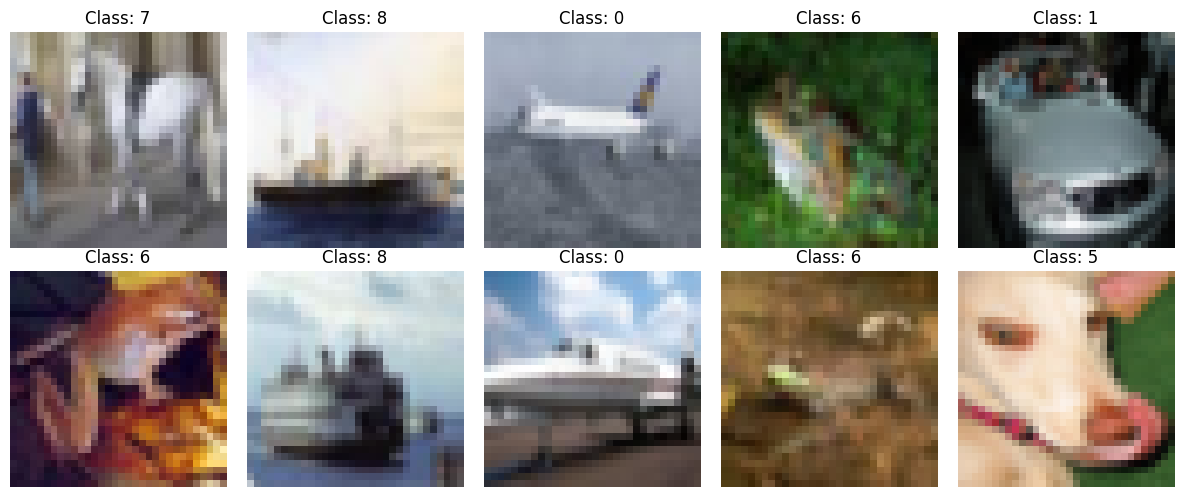

In [6]:
# Visualize examples from the dataset in random order
import numpy as np
import matplotlib.pyplot as plt

num_examples = 10  # Number of examples to visualize
indices = np.random.choice(len(X_train), num_examples, replace=False)

plt.figure(figsize=(12, 5))
for i, idx in enumerate(indices):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train[idx].reshape(3, 32, 32).transpose(1, 2, 0).astype('uint8'))
    plt.title(f'Class: {y_train[idx]}')
    plt.axis('off')

plt.tight_layout()
plt.show()

Training an SVC on this dataset may take a lot of time with a single CPU. Let's narrow down the dataset and apply dimensionality reduction to get a much more compact version of it. This way, a large amount of information will be lost, but the computation time will decrease. We will pick 1100 of images from each class for training, and 100 samples from each class for testing. Then, we will apply **Principal Component Analysis (PCA)**, a dimensionality reduction method. New dataset will have 400 features.

In [7]:
X_train_subset, y_train_subset, X_test_subset, y_test_subset = [], [], [], []

ones = [1100 for j in range(10)]

for x, y in zip(X_train, y_train):
    if ones[y] != 0:

        X_train_subset.append(x)
        y_train_subset.append(y)
        ones[y]-=1

print(np.asarray(X_train_subset).shape)

ones = [100 for j in range(10)]

for x, y in zip(X_test, y_test):
    if ones[y] != 0:

        X_test_subset.append(x)
        y_test_subset.append(y)
        ones[y]-=1

X_train_subset, y_train_subset, X_test_subset, y_test_subset = np.asarray(X_train_subset), np.asarray(y_train_subset), np.asarray(X_test_subset), np.asarray(y_test_subset)

(11000, 3072)


Next, we need to **vectorize** the images: 

In [9]:
# Preprocessing: reshape the image data into rows
X_train = np.reshape(X_train_subset, (X_train_subset.shape[0], -1))
X_test = np.reshape(X_test_subset, (X_test_subset.shape[0], -1))
y_train = y_train_subset
y_test = y_test_subset
# As a sanity check, print out the shapes of the data
print('Training data shape: ', X_train.shape)
print('Test data shape: ', X_test.shape)

Training data shape:  (11000, 3072)
Test data shape:  (1000, 3072)


The next step is to normalize the dataset. And applying PCA to decrease the feature dimensions to 400. You are free to increase the dimension by tackling with **n_components** parameter. This will 

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

pca = PCA(n_components=400)

# Normalize the dataset
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pca.fit_transform(X_train_scaled)
X_test_scaled = pca.fit_transform(X_test_scaled)

print('Training data shape after PCA: ', X_train_scaled.shape)

Training data shape after PCA:  (11000, 400)


Later, You are assigned call an RBF kernel classifier.

You should use **cross validation** (you may use sklearn) and report the best hyperparameters $\gamma$ and $C$ you've found. You will use these hyperparameters for testing later. Once you have selected the best hyperparameters for each kernel, complete the following:

- Report Confusion matrix, Recall, Precision, and F1 Score.
- Visualize the learned weights for each class.
  
Suggested ranges for searching C and $\gamma$ parameters:

- C (Regularization parameter): [0.1, 1, 10, 100, 1000]. It's common to use a logarithmic scale for searching C values.

- $\gamma$ (Kernel coefficient for 'rbf' kernel): [0.001, 0.01, 0.1, 1, 10, 100] Since the dataset will be scaled, you can explore a broader range of gamma values.

In [21]:
#############################################################################################################################
################################################## TO DO ####################################################################                                                                                      #
#Define parameter grids for RBF for hyperparameter tuning.                                                                  #
#Perform cross-validation.                                                                                                  #
#Report the best hyperparameters for each kernel type.                                                                      #
#Predict on the test set using each tuned model.                                                                            #
#Evaluate each model using confusion matrix, recall, recpision, and F1 score. Use confusion_matrix and                      # 
#classification_report from sklearn.metrics.                                                                                #
#############################################################################################################################

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt

# Define parameter grids for RBF for hyperparameter tuning
param_grid_rbf = {'C': [0.1, 1, 10, 100, 1000], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

# Perform cross-validation
print("Performing cross-validation for the RBF kernel...")
grid_rbf = GridSearchCV(SVC(kernel='rbf'), param_grid_rbf, cv=5, verbose=3) # cv=5
grid_rbf.fit(X_train_scaled, y_train)
print("Cross-validation for RBF kernel completed.")

# Report the best hyperparameters for the RBF kernel
print("Best hyperparameters for RBF kernel:", grid_rbf.best_params_)

# Predict on the test set using the tuned RBF model
y_pred_rbf = grid_rbf.predict(X_test_scaled)

# Evaluate the RBF model
print("\nRBF Kernel:")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rbf))
print("Classification Report:\n", classification_report(y_test, y_pred_rbf))

#############################################################################################################################
#                                                    END OF YOUR CODE                                                       #
#############################################################################################################################

Performing cross-validation for the RBF kernel...
Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV 1/5] END ................C=0.1, gamma=0.001;, score=0.308 total time= 1.4min
[CV 2/5] END ................C=0.1, gamma=0.001;, score=0.278 total time= 1.3min
[CV 3/5] END ................C=0.1, gamma=0.001;, score=0.282 total time= 1.3min
[CV 4/5] END ................C=0.1, gamma=0.001;, score=0.285 total time= 1.3min
[CV 5/5] END ................C=0.1, gamma=0.001;, score=0.282 total time= 1.3min
[CV 1/5] END .................C=0.1, gamma=0.01;, score=0.107 total time= 1.4min
[CV 2/5] END .................C=0.1, gamma=0.01;, score=0.105 total time= 1.4min
[CV 3/5] END .................C=0.1, gamma=0.01;, score=0.104 total time= 1.4min
[CV 4/5] END .................C=0.1, gamma=0.01;, score=0.104 total time= 1.4min
[CV 5/5] END .................C=0.1, gamma=0.01;, score=0.106 total time= 1.4min
[CV 1/5] END ..................C=0.1, gamma=0.1;, score=0.210 total time= 1.4m

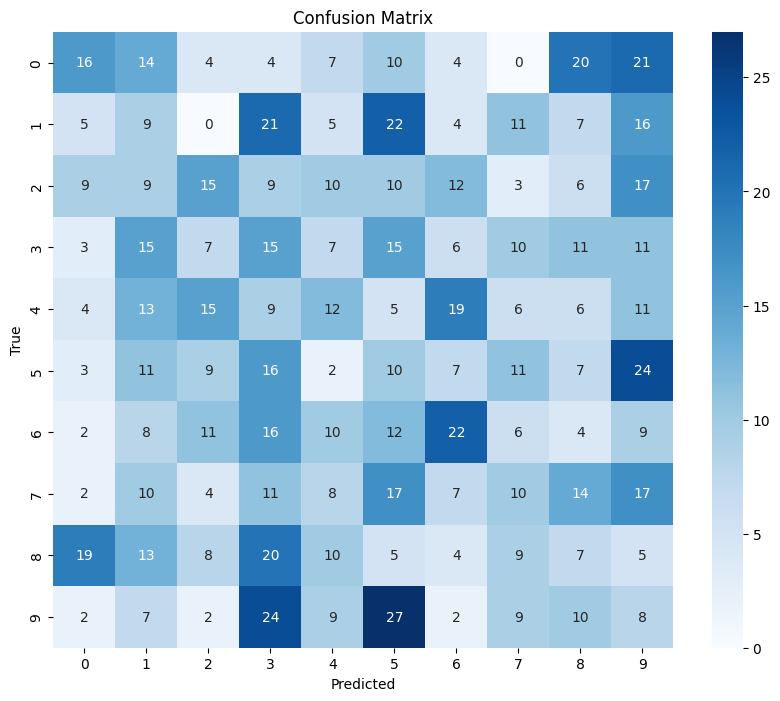

<Figure size 1000x600 with 0 Axes>

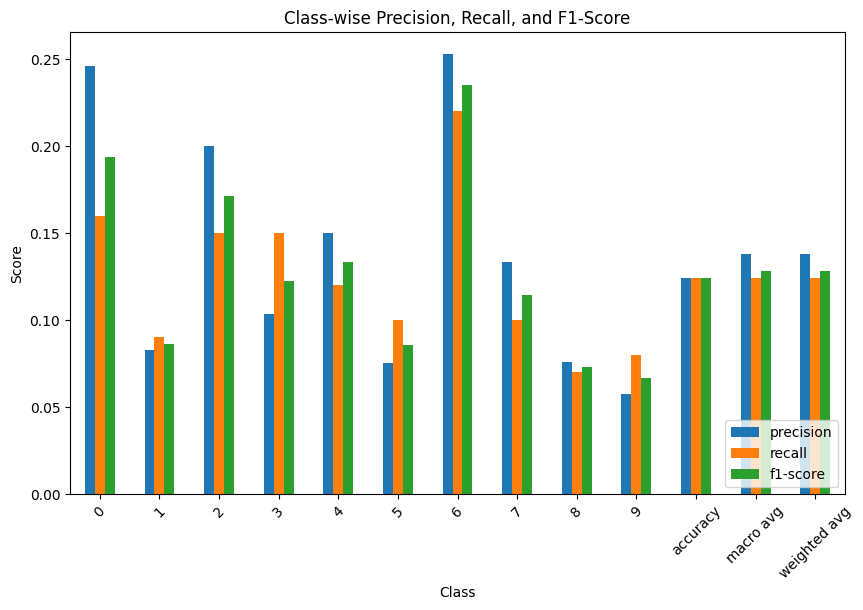

In [11]:
import pickle

# # Save the model
# with open('trained_model_q3.pkl', 'wb') as file:
#     pickle.dump(grid_rbf, file)

with open('trained_model_q3.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

grid_rbf = loaded_model

# Predict on the test set using the tuned RBF model
y_pred_rbf = grid_rbf.predict(X_test_scaled)

from sklearn.metrics import confusion_matrix
import seaborn as sns

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred_rbf)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=grid_rbf.classes_, yticklabels=grid_rbf.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

from sklearn.metrics import classification_report

# Generate classification report
report = classification_report(y_test, y_pred_rbf, target_names=grid_rbf.classes_, output_dict=True)

# Convert to DataFrame for visualization
import pandas as pd
report_df = pd.DataFrame(report).transpose()

# Plot precision, recall, and F1-score
plt.figure(figsize=(10, 6))
report_df[['precision', 'recall', 'f1-score']].plot(kind='bar', figsize=(10, 6))
plt.title('Class-wise Precision, Recall, and F1-Score')
plt.xlabel('Class')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(loc='lower right')
plt.show()

In [22]:
explained_variance = pca.explained_variance_ratio_

maks = (-1, -1)
second_maks = (-1, -1)
for i, exp_var in enumerate(explained_variance):
    if exp_var > maks[0]:
        second_maks = maks
        maks = exp_var, i
    elif exp_var > second_maks[0]:
        second_maks = exp_var, i

print(f"Explained variance of the best principal component : {maks[0]*100:.2f}%, index: {maks[1]}")
print(f"Explained variance of the second best principal component: {second_maks[0]*100:.2f}%, index: {second_maks[1]}")

Explained variance of the best principal component : 27.42%, index: 0
Explained variance of the second best principal component: 10.83%, index: 1


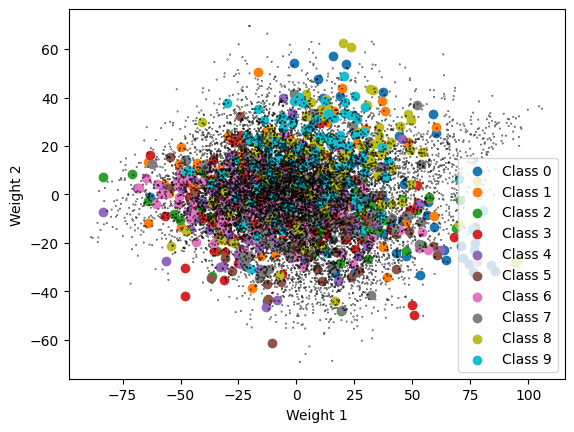

In [23]:
import pickle

with open('trained_model_q3.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

grid_rbf = loaded_model

best_estimator = grid_rbf.best_estimator_

support_vectors = best_estimator.support_vectors_

classes = np.unique(y_test)

class_data = {}

for c in classes:
    indices = np.where(y_test == c)[0]
    data = X_test_scaled[indices]
    class_data[c] = data

for class_label in classes:
    class_data_ = class_data[class_label]
    plt.scatter(class_data_[:, 0], class_data_[:, 1], label=f"Class {class_label}")

plt.xlabel("Weight 1")
plt.ylabel("Weight 2")
plt.legend()

plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=0.1, facecolors='none', edgecolors='k', label='Support Vectors') # For better visualization we determine the size of the support vectors as 0.1

plt.show()

Using 2 features and best two of the support vectors we plot the data.  
Due to lack of accuraccy of our model and poorness of the 2-D visualization with 400 features our final plot looks like above.